### Our final aim is to be able to make prediction on the quality of wine given to us based on the parameters of our data set

#### Logistic Regression and KNN 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#### loading the data

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

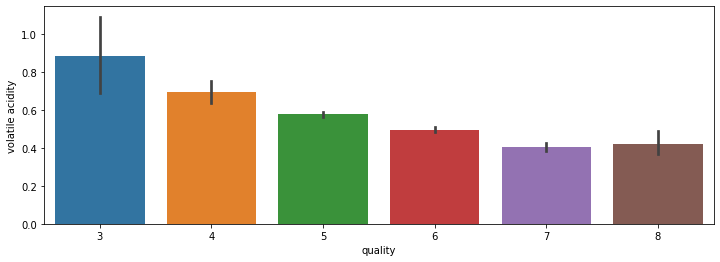

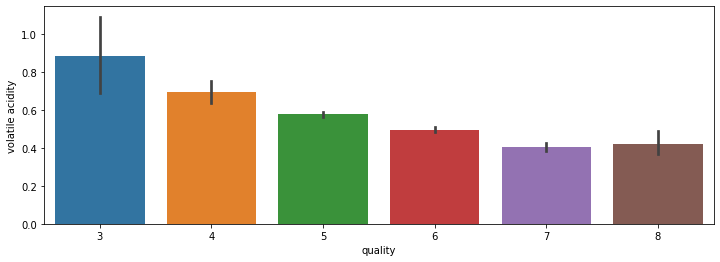

In [6]:
plt.figure(figsize=(12,4))
sns.barplot(x='quality',y='volatile acidity', data=df.sort_values('quality'))

In [7]:
df.corr()['quality'].sort_values(ascending=False)#.plot(kind='bar')

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

#### wine quality vs alcohol 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

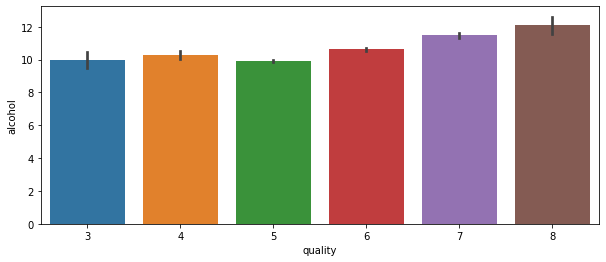

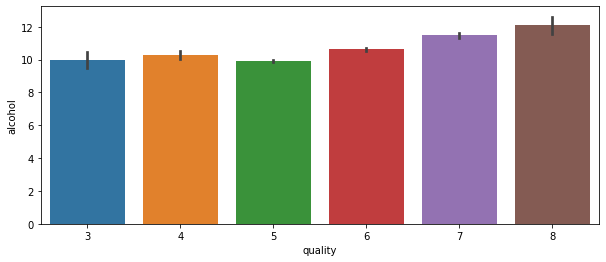

In [8]:
plt.figure(figsize=(10,4))
sns.barplot(y='alcohol',x='quality',data=df.sort_values('alcohol'))

#### heatmap correlation 

In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

<AxesSubplot:>

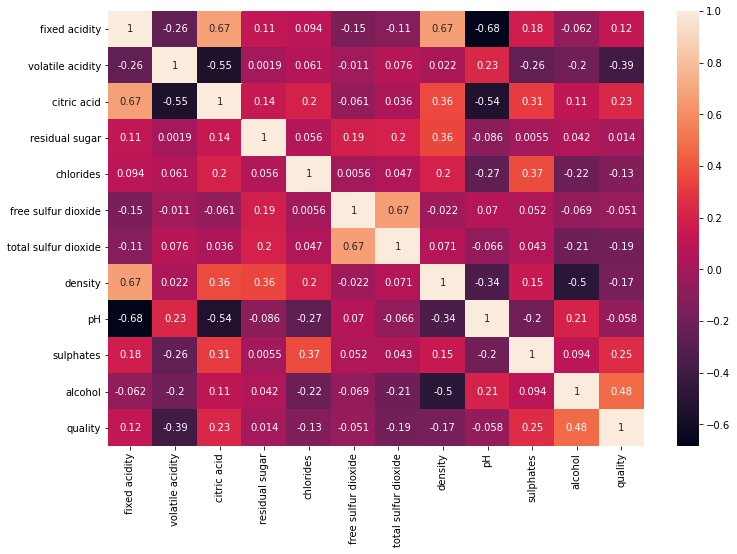

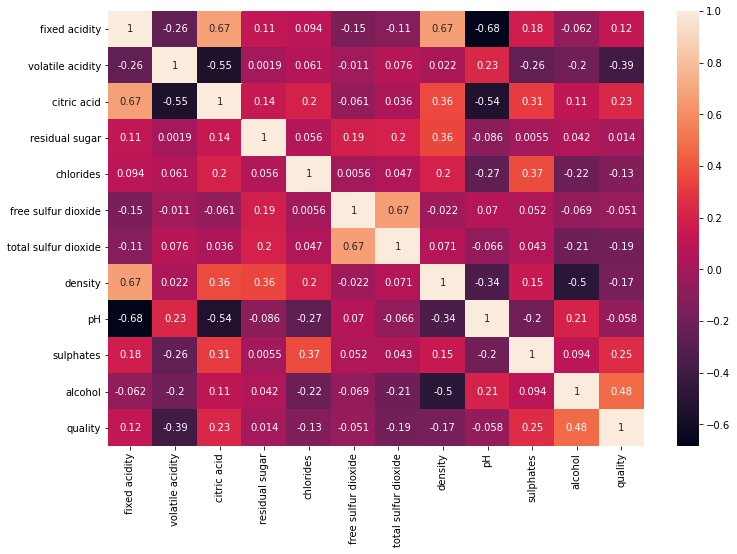

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

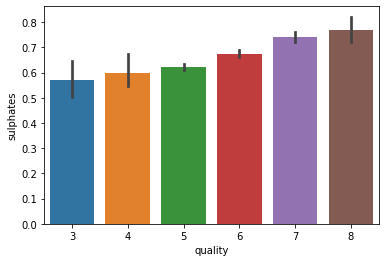

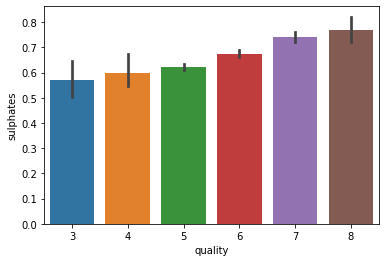

In [11]:
sns.barplot(x='quality',y='sulphates',data=df)

<AxesSubplot:xlabel='alcohol', ylabel='sulphates'>

<AxesSubplot:xlabel='alcohol', ylabel='sulphates'>

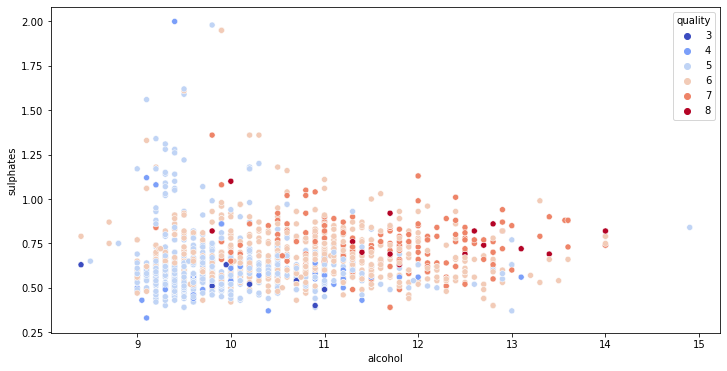

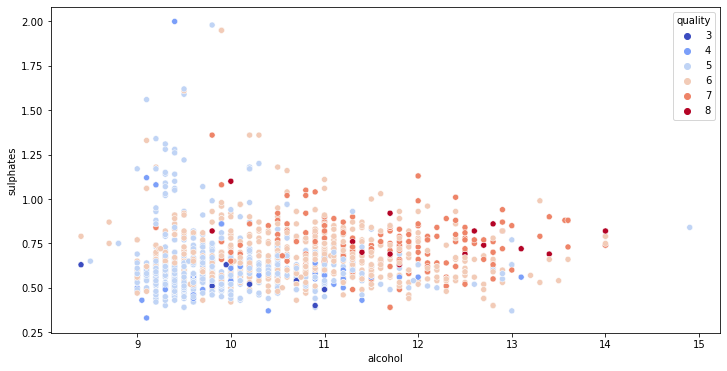

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='alcohol',y='sulphates',data=df,hue='quality',palette='coolwarm')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

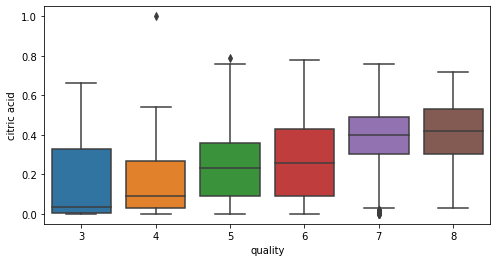

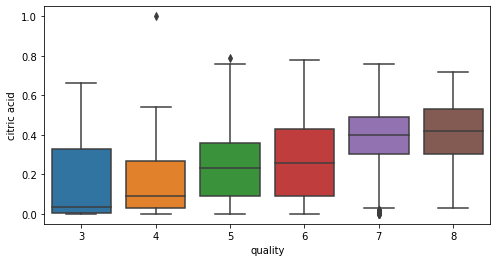

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(y='citric acid',x='quality',data=df)

<AxesSubplot:>

<AxesSubplot:>

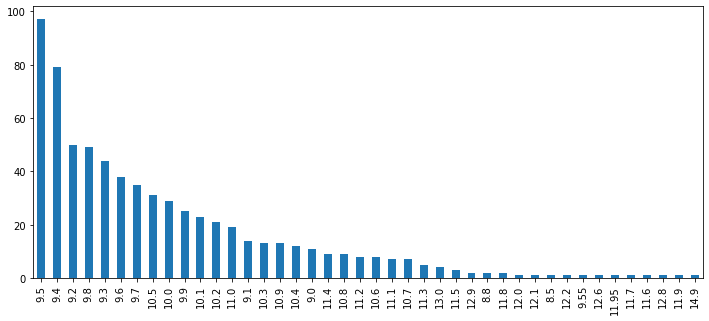

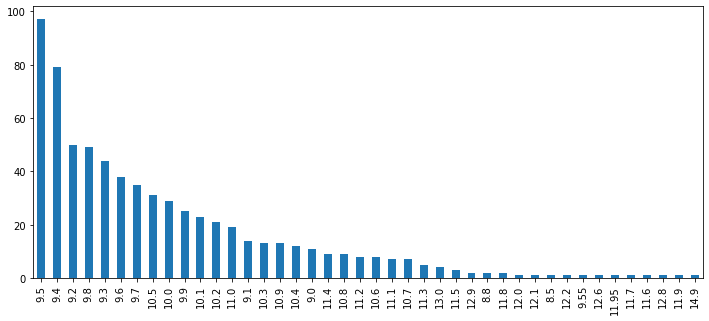

In [15]:
df[df['quality']==5]['alcohol'].value_counts().plot(kind='bar',figsize=(12,5))


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

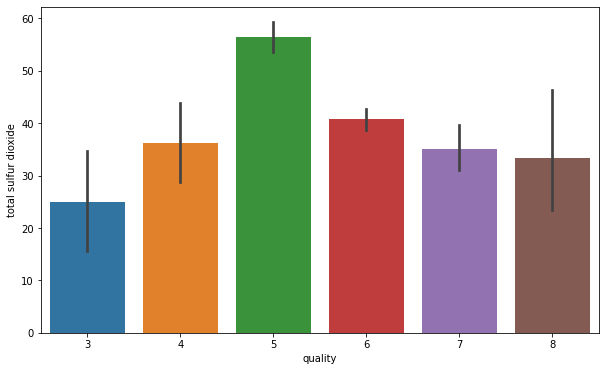

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

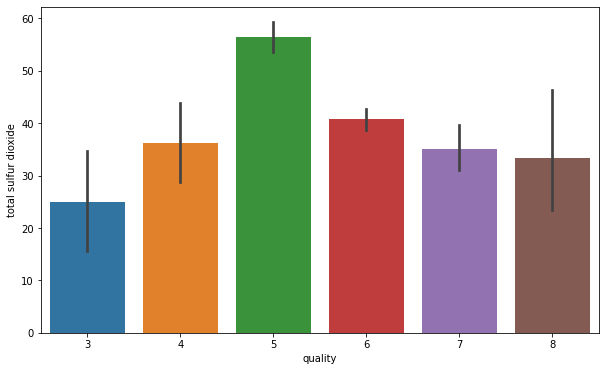

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

## Data Preprocessing 

making binary classification for response variable

In [17]:
#Dividing wine as good and bad by giving the limit for the quality

In [18]:
bins=(2,6.5,8)
group_names=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=group_names)

In [19]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

bad     1382
good     217
Name: quality, dtype: int64

In [20]:
def qul(quality):
    if quality=='good':
        return 1
    else:
        return 0
    

In [21]:
df['quality']=df['quality'].apply(qul)

In [22]:
    df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

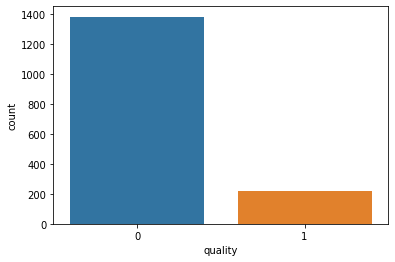

<AxesSubplot:xlabel='quality', ylabel='count'>

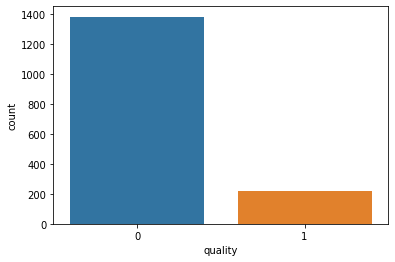

In [23]:
sns.countplot(x='quality',data=df)

In [24]:
X=df.drop('quality',axis=1)
y=df['quality']

### train test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Checking performance of our model

#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [34]:
model=LogisticRegression()

In [35]:
model.fit(X_train,y_train)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
predictions=model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       436
           1       0.26      0.41      0.32        44

   micro avg       0.84      0.84      0.84       480
   macro avg       0.60      0.65      0.62       480
weighted avg       0.88      0.84      0.86       480

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       436
           1       0.26      0.41      0.32        44

   micro avg       0.84      0.84      0.84       480
   macro avg       0.60      0.65      0.62       480
weighted avg       0.88      0.84      0.86       480



### K-Neartest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn=KNeighborsClassifier(n_neighbors=5)

In [44]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
knn_pred=knn.predict(X_test)
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.38      0.46      0.42        57

   micro avg       0.85      0.85      0.85       480
   macro avg       0.65      0.68      0.66       480
weighted avg       0.86      0.85      0.85       480

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.38      0.46      0.42        57

   micro avg       0.85      0.85      0.85       480
   macro avg       0.65      0.68      0.66       480
weighted avg       0.86      0.85      0.85       480



#### choosing k value (Elbow Method)

In [54]:
errors=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))


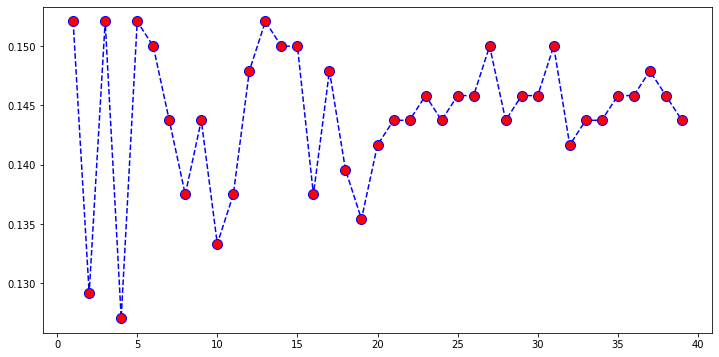

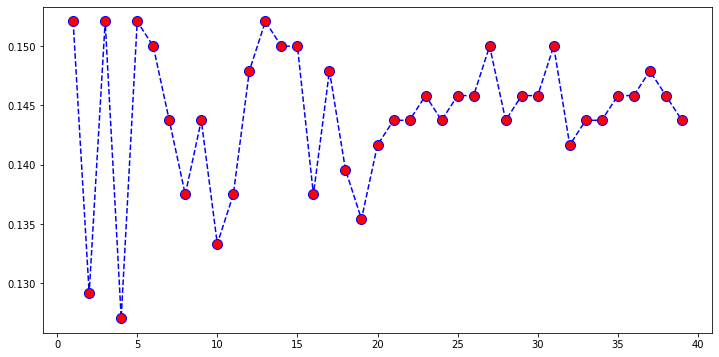

In [57]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),errors,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [67]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)


In [68]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       445
           1       0.25      0.49      0.33        35

   micro avg       0.86      0.86      0.86       480
   macro avg       0.60      0.69      0.62       480
weighted avg       0.90      0.86      0.88       480

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       445
           1       0.25      0.49      0.33        35

   micro avg       0.86      0.86      0.86       480
   macro avg       0.60      0.69      0.62       480
weighted avg       0.90      0.86      0.88       480

